<h1><center>Physique numérique (PHY-3500) - TP1</center></h1>
<hr>
<br><br>

**Membres de l'équipe**
| Nom | NI |
| --- | :---: |
| Maxime Tousignant-Tremblay | 536 772 369 |
| Philippe Morin | 536 776 382 |
| Emilie Carré Smith| 111 235 839 |


In [1]:
from functools import partial
from typing import Optional, Callable

import numpy as np
from scipy import stats as st
from scipy import integrate as intgr
from matplotlib import pyplot as plt


%matplotlib inline
%config InlineBackend.figure_formats = "svg",

plt.style.use("LabReport.mplstyle")


## Numéro 1

*Trouvez analytiquement $\pi(\lambda|X = \text{\textbf{x}})$ et déduisez la valeur de $f(\text{\textbf{x}})$. Indice : trouvez une fonction $g(\lambda)$ proportionnelle à la loi a posteriori, ce qui vous permettra de retrouver la même forme que la loi a priori $\pi(\lambda)$. Cette loi a priori $\pi(\lambda)$ est conjuguée à la vraisemblance $f(\text{\textbf{x}}|\Lambda=\lambda)$.*
\\ \\
Partons de la forme a postériori donnée, puis simplifions là:
$$\pi(\lambda|X = \text{\textbf{x}}) = \frac{\lambda^{\alpha-1}e^{-\beta \lambda}\beta^{\alpha}}{f(x)\Gamma(\alpha)}\prod\limits_{i=1}^T \lambda e^{-\lambda x_i}$$

$$= \frac{\lambda^{\alpha+T-1}e^{-\beta \lambda}\beta^{\alpha}}{f(x)\Gamma(\alpha)}e^{-\lambda \sum_{i=1}^T x_i}$$

$$= \frac{\beta^{\alpha}\lambda^{\alpha+T-1}e^{-\lambda\left(\beta+\sum_{i=1}^T x_i\right)}}{f(x)\Gamma(\alpha)}$$

Posons $g(\lambda)$ ainsi:
$$ g(\lambda) = \frac{\beta^{\alpha}\lambda^{\alpha+T-1}e^{-\lambda\left(\beta+\sum_{i=1}^T x_i\right)}}{\Gamma(\alpha)}$$

Cette fonction est proportionnelle à la fonction à postériori, et est composé du conjugué de $\pi(\lambda)$ et de $f(x|\Lambda=\lambda)$. On sait que f(x) agit comme une constante de normalisation dans la loi a postériori, qui considère toute les valeurs possible de $\lambda$ du conjugué de la fonction a priori et de vraissamblance. Donc, pour trouver f(x), il suffit de trouver la valeur de $g(\lambda)$ intégré sur tous les $\lambda$

$$ \longrightarrow f(x) = \int_0^\infty g(\lambda)d\lambda$$

$$ = \frac{\beta^{\alpha}}{\Gamma(\alpha)}\int_0^\infty \lambda^{\alpha+T-1}e^{-\lambda\left(\beta+\sum_{i=1}^T x_i\right)}d\lambda$$

Cette forme est très similaire à une fonction $\Gamma$. Utilisons tout de même Wolfram Alpha pour résouder l'intégrale analytiquement:

$$ f(x) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}\left[\Gamma(\alpha+T)\left(\beta+\sum_{i=1}^T x_i\right)^{-\alpha-T}\right]$$

Ainsi, on peut trouver la forme finale de $\pi(\lambda|X = \text{\textbf{x}})$

$$\pi(\lambda|X = \text{\textbf{x}})=\frac{\beta^{\alpha}\lambda^{\alpha+T-1}e^{-\lambda\left(\beta+\sum_{i=1}^T x_i\right)}}{f(x)\Gamma(\alpha)}$$

$$\longrightarrow \pi(\lambda|X = \text{\textbf{x}})=\frac{\lambda^{\alpha+T-1}e^{-\lambda\left(\beta+\sum_{i=1}^T x_i\right)\left(\beta+\sum_{i=1}^T x_i\right)^{\alpha+T}}}{\Gamma(\alpha+T)}$$


## Numéro 2

*Évaluez analytiquement l’espérance a priori $\lambda_0:=E[\Lambda]=\int_0^\infty \pi(\lambda)d\lambda$ et l’espérance a posteriori $\hat{\lambda}$. Rappel : $\Gamma(z):=\int_0^\infty t^{z-1}e^{-t}dt$ et $\Gamma(z+1)=z\Gamma(z)$*

**Calcul de $\lambda_0$**

$$ \lambda_0 = \frac{\beta^{\alpha}}{\Gamma(\alpha)}\int_0^\infty \lambda^{\alpha-1}e^{-\beta\lambda}d\lambda$$

$$ = \frac{\beta^{\alpha}}{\Gamma(\alpha)}\left(\beta^{-\alpha}\Gamma(\alpha)\right)$$

$$ = 1$$

**Calcul de $\hat{\lambda}$**

$$ \hat{\lambda} = \frac{\left(\beta+\sum_{i=1}^T x_i\right)^{\alpha+T}}{\Gamma(\alpha+T)}\int_0^\infty \lambda^{\alpha+T}e^{-\lambda\left(\beta+\sum_{i=1}^T x_i\right)} d\lambda$$

$$ = \frac{\left(\beta+\sum_{i=1}^T x_i\right)^{\alpha+T}}{\Gamma(\alpha+T)}\left[\Gamma(\alpha+T+1)\left(\beta+\sum_{i=1}^T x_i\right)^{-\alpha-T-1}\right]$$

$$ = \frac{(\alpha+T)\,\Gamma(\alpha+T)}{\Gamma(\alpha+T)\left(\beta+\sum_{i=1}^T x_i\right)}$$

$$ = \frac{\alpha+T}{\beta+\sum_{i=1}^T x_i}$$

## Numéro 3

*Écrivez une fonction permettant de lire les données des trois fichiers textes qui vous sont fournis.
Chaque ligne d’un fichier est le temps en millisecondes auquel une impulsion a été mesurée.*

In [2]:
def loadtxt(run : int) -> np.ndarray[np.float64]:
    """Extract the impulse time dataset from a given text file.

    Parameter
    ---------
        run
            The dataset file number.

    Returns
    -------
        time
            The numpy array containing the time, in milliseconds,
            of a mesured impulse.
    """
    t = np.loadtxt(f"activite_temps_{run}.txt")
    return t


## Numéro 4

*En inférence bayésienne, il n’est généralement pas possible d’évaluer analytiquement $f(\text{\textbf{x}})$ et l’équation (5). En posant que $\alpha=2$ et $\beta=1/4$, évaluez numériquement $f(\text{\textbf{x}})$ et $\hat{\lambda}$ pour chaque série de données $x$ en utilisant la méthode de Simpson et la méthode de Romberg. Considérez que $\lambda=200$ est suffisamment grand dans les bornes d’intégration.*

D'après le théorème de Bayes, on a:
$$\pi(\lambda|X=\text{\textbf{x}}) = \frac{f(\text{\textbf{x}}|\Lambda=\lambda)\pi(\lambda)}{f(\text{\textbf{x}})} = \frac{f(\text{\textbf{x}}|\Lambda=\lambda)\pi(\lambda)}{\int f(\text{\textbf{x}}|\Lambda=\lambda)\pi(\lambda)d\lambda}\ .$$

On suppose que la valeur *a priori* $\pi(\lambda)$ obéit à une loi Gamma de paramètres $\alpha$ et $\beta$ telle que:
$$\pi(\lambda) = \frac{\lambda^{\alpha-1}e^{-\beta\lambda}\beta^{\alpha}}{\Gamma(\alpha)} \ .$$

## Définition d'une fonction d'intégration par la méthode de Romberg

In [3]:
def displaymat(func: Callable, a: int, b: int, R: np.ndarray[np.float64]):
    """Display the Romberg result matrix for easier debugging.

    Parameters
    ----------
        func
            The function that has been integrated.
        a
            The lower limit of integration.
        b
            The upper limit of integration.
        R
            The Romberg result matrix.
    """
    # Initialize matrix indexes
    i = j = 0
    _len = len(R)

    # Compute the number of function evaluations
    nbf = 2**(_len - 1) + 1

    print(f"Romberg integration of {repr(func)} from {[a, b]} \n")
    print(f"Steps \t StepSize Results")
    idx = np.arange(_len)
    stepsize = (b - a) / 2**idx
    for i in idx:
        print("%d \t %d \t " % (2**i, stepsize[i]), end=" ")
        for j in range(i+1):
            print("%.3e" % (R[i, j]), end=" ")
        print("")
    print(f"\nThe final result is: {R[i, j]} after {nbf} function evaluations.")


def romb(
    f: Callable,
    a: int,
    b: int,
    n: int = 10,
    show: bool = False,
    **kwargs,
) -> np.float64:
    """Compute the integral of 'f' from 'a' to 'b' using Romberg integration.

    Parameters
    ----------
        f
            The function to integrate.
        a
            The lower limit of integration. 
        b
            The upper limit of integration.
        n
            The number of iterations to use.
        show
            Whether to print the results. Defaults to False.

    Returns
    -------
        approx
            The approximate value of the integral.
    """
    # Initialize the Romberg integration table
    R = np.empty((n, n))

    # Configure function f to pass extra arguments
    f = partial(f, **kwargs)

    # Compute the trapezoidal rule for the first column
    h = b - a
    R[0, 0] = 0.5 * h * (f(a) + f(b))

    # Iterate to refine the approximation
    idx = np.arange(1, n)
    h *= 0.5**idx
    for i in idx:
        k = np.arange(1, 2**i, 2)
        sum_f = f(a + k * h[i-1]).sum()
        R[i, 0] = 0.5 * R[i-1, 0] + sum_f * h[i-1]

        # Compute the rest of the column using Richardson extrapolation
        for j in range(1, i+1):
            R[i, j] = R[i, j-1] + (R[i, j-1] - R[i-1, j-1]) / (4**j - 1)

    # Send table to display function for debuging purposes if specified
    if show is True:
        displaymat(f, a, b, R)

    approx = R[n-1, n-1]
    return approx


## Résolution du problème

In [4]:
# Problem constants
ALPHA = 2
BETA = 0.25


@np.vectorize(excluded=["xdata", "fx"])
def bayesian_inf(
    lamb: np.float64,
    xdata: np.ndarray[np.float64],
    fx: Optional[np.float64] = None,
) -> np.ndarray[np.float64]:
    """Compute the normalized or unnormalized posterior values.

    Parameters
    ----------
        lamb
            The rate parameter of the exponential distribution.
        xdata
            The time difference dataset of the distribution.
        fx
            The 'evidence' or 'Marginal likelihood' of the distribution.

    Returns
    -------
        post
            The normalized posterior values if 'fx' is given, the unnormalized
            value otherwise.
    """
    # Compute the prior
    prior = st.gamma.pdf(lamb, ALPHA, scale=1/BETA)

    # Compute the liklihood
    likelihood = np.prod(lamb * np.exp(-lamb * xdata))

    # Compute the distribution's posterior
    post = likelihood * prior
    if fx is not None:
        post *= lamb / fx
    return post


def fx_simp(
    data: int,
    a: int,
    b: int,
    n: Optional[int] = None,
) -> np.float64:
    """Compute f(x) and MLE using Simpson's integration rule.

    Parameters
    ----------
        data
            The dataset to integrate using Simpson's rule.
        a
            The lower limit of integration.
        b
            The upper limit of integration.
        n
            The number of samples between the integration limits. Defaults to
            50, the default value of the 'linspace' function.

    Returns
    -------
        fx
            The 'evidence' or 'Marginal likelihood' of the distribution.
        lamb_hat
            The Maximum Likelihood Estimate (MLE) for lambda.
    """
    if n is None:
        n = b + 100
    _lamb = np.linspace(a, b, n)

    fx = intgr.simpson(bayesian_inf(_lamb, xdata=data), x=_lamb)
    lamb_hat = intgr.simpson(bayesian_inf(_lamb, xdata=data, fx=fx), x=_lamb)
    return fx, lamb_hat


def fx_romb(
    data: np.ndarray[np.float64],
    a: int,
    b: int,
    n: Optional[int] = 10,
) -> tuple[np.float64 | float]:
    """Compute f(x) and MLE with Romberg's integration rule.

    Parameters
    ----------
        data
            The dataset to integrate using Simpson's rule.
        a
            The lower limit of integration.
        b
            The upper limit of integration.
        n
            The number of iterations to use.

    Returns
    -------
        fx
            The 'evidence' or 'Marginal likelihood' of the distribution.
        lamb_hat
            The Maximum Likelihood Estimate (MLE) for lambda.
    """
    fx = romb(bayesian_inf, a, b, xdata=data, n=n)
    lamb_hat = romb(bayesian_inf, a, b, xdata=data, n=n, fx=fx)
    return fx, lamb_hat


for k in range(3):
    tdata = np.ediff1d(loadtxt(k))
    _simps = fx_simp(tdata, 0, 200, 1000)
    _romb = fx_romb(tdata, 0, 200, 10)
    print(f"Results for dataset {k}:")
    print(f"Simpson: f(x) \u2248 {_simps[0]}, \u03BB_hat \u2248 {_simps[1]}")
    print(f"Romberg: f(x) \u2248 {_romb[0]}, \u03BB_hat \u2248 {_romb[1]} \n")


Results for dataset 0:
Simpson: f(x) ≈ 3.815472911396959e+48, λ_hat ≈ 8.879626693245141
Romberg: f(x) ≈ 3.8146591982534476e+48, λ_hat ≈ 8.879362405236945 

Results for dataset 1:
Simpson: f(x) ≈ 2.283316152735809e+85, λ_hat ≈ 21.070284448840063
Romberg: f(x) ≈ 2.2833160835509094e+85, λ_hat ≈ 21.0702837622328 

Results for dataset 2:
Simpson: f(x) ≈ 4.12526757520123e+105, λ_hat ≈ 33.91355504031561
Romberg: f(x) ≈ 4.1252675874532674e+105, λ_hat ≈ 33.91355487153926 



# Numéro 5

En comparant à votre solution analytique, tracez l’erreur sur $f(\text{\textbf{x}})$ et $\hat{\lambda}$ engendrée par vos deux méthodes d’intégration en fonction du nombre de tranches pour le jeux de données de votre choix.

# Numéro 6

Quels sont les défis reliés à l’intégration numérique de l’évidence $f(\text{\textbf{x}})$ en inférence bayésienne ?
<br><br>

blabla

# Numéro 7

Tracez un histogramme des fréquences relatives des écarts entre les impulsions. Tracez également la loi du modèle a priori $f(x_i|\Lambda = \lambda_0)$ et celle ajustée $f(x_i|\Lambda = \hat{\lambda})$.

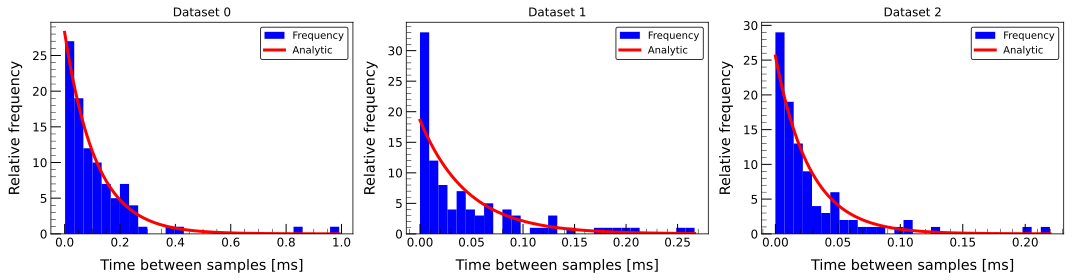

In [5]:
# Bin size: interval between two
# consecutive values in "ms"
NBINS = 30

# Initializing figures
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for k in range(3):
    # Original distribution properties
    t = np.ediff1d(loadtxt(k))
    tmean = t.mean()
    tmax = t.max()
    rate = 1 / tmean

    # Generating distribution
    n = 1000
    t_gen = np.linspace(0, tmax, n)
    # dt = tmax / (n - 1)
    dist_exp = st.expon.pdf(t_gen, scale=1/rate)
    likelihood = rate * np.exp(-rate * t_gen)

    # Rescaling theoretical distribution to match sample number
    freq = dist_exp * t.size * tmax / NBINS

    # Creating plots
    ax = axs[k]
    ax.hist(t, NBINS, color="b", label="Frequency")
    ax.plot(t_gen, freq, "r", lw=3, label="Analytic")
    ax.set_xlabel("Time between samples [ms]")
    ax.set_ylabel("Relative frequency")
    ax.set_title(f"Dataset {k}")
    ax.legend()


# Numéro 8

Avec vos connaissances sur le processus de Poisson et l’inférence bayésienne, que pouvez-vous conclure du comportement de chaque neurone grâce à vos résultats ? Les processus sont-ils poissonien dans tous les cas ?
<br><br>

blabla

# Références

blabla